<a href="https://colab.research.google.com/github/damsdaddy/BDC101/blob/main/FRIENDS_%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step1. 라이브러리를 로드합니다.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re, json
from nltk.tokenize import word_tokenize
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tqdm.notebook import tqdm

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Step2. 구글 드라이브를 마운트합니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step3. 마운트된 구글드라이브에 데이터셋이 있는 경로를 설정하고 파일을 로드합니다.

In [3]:
mypath = '/content/drive/MyDrive/Colab Notebooks/dataset/'
train_data = pd.read_csv(mypath+'friends_train_preprocess.csv', sep='|', index_col=0)
test_data = pd.read_csv(mypath+'friends_test_preprocess.csv', sep='|', index_col=0)

Step4. 정상적으로 로드되었는지 확인합니다.

In [4]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
train_data[:5] # 상위 5개 출력

훈련용 리뷰 개수 : 10268


,speaker,utterance,emotion,annotation
0,Chandler,also i was the point person on my company's tr...,1,4100000
1,The Interviewer,you must've had your hands full.,1,5000000
2,Chandler,that i did. that i did.,1,5000000
3,The Interviewer,so let's talk a little bit about your duties.,1,5000000
4,Chandler,my duties? all right.,6,2000030


In [5]:
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력
test_data[:5]

테스트용 리뷰 개수 : 2500


,speaker,utterance,emotion,annotation
0,Mark,why do all you're coffee mugs have numbers on ...,6,2000030
1,Rachel,oh. that's so monica can keep track. that way ...,8,2100011
2,Rachel,y'know what?,1,3000020
3,Ross,it didn't.,1,5000000
4,Frank,"okay, so what you used to have with rachel, is...",2,1300010


Step5. (선택) 발화자(speaker) 정보도 데이터셋에 포함시킵니다.

In [6]:
train_data['utterance'] = train_data['speaker'] + ' ' + train_data['utterance']
test_data['utterance'] = test_data['speaker'] + ' ' + test_data['utterance']
train_data['utterance'] = train_data['utterance'].str.lower()
test_data['utterance'] = test_data['utterance'].str.lower()

Step6. 토큰화합니다.

In [7]:
X_train = []
for sentence in tqdm(train_data['utterance']):
    temp_X = []
    temp_X = word_tokenize(sentence)
    X_train.append(temp_X)

print(X_train[:30])


[['chandler', 'also', 'i', 'was', 'the', 'point', 'person', 'on', 'my', 'company', "'s", 'transition', 'from', 'the', 'kl', '-', '5', 'to', 'gr', '-', '6', 'system', '.'], ['the', 'interviewer', 'you', 'must', "'ve", 'had', 'your', 'hands', 'full', '.'], ['chandler', 'that', 'i', 'did', '.', 'that', 'i', 'did', '.'], ['the', 'interviewer', 'so', 'let', "'s", 'talk', 'a', 'little', 'bit', 'about', 'your', 'duties', '.'], ['chandler', 'my', 'duties', '?', 'all', 'right', '.'], ['the', 'interviewer', 'now', 'you', "'ll", 'be', 'heading', 'a', 'whole', 'division', ',', 'so', 'you', "'ll", 'have', 'a', 'lot', 'of', 'duties', '.'], ['chandler', 'i', 'see', '.'], ['the', 'interviewer', 'but', 'there', "'ll", 'be', 'perhaps', '30', 'people', 'under', 'you', 'so', 'you', 'can', 'dump', 'a', 'certain', 'amount', 'on', 'them', '.'], ['chandler', 'good', 'to', 'know', '.'], ['the', 'interviewer', 'we', 'can', 'go', 'into', 'detail'], ['chandler', 'no', 'do', "n't", 'i', 'beg', 'of', 'you', '!'], 

In [8]:
X_test = []
for sentence in tqdm(test_data['utterance']):
    temp_X = []
    temp_X = word_tokenize(sentence)
    X_test.append(temp_X)

print(X_test[:30])


[['mark', 'why', 'do', 'all', 'you', "'re", 'coffee', 'mugs', 'have', 'numbers', 'on', 'the', 'bottom', '?'], ['rachel', 'oh', '.', 'that', "'s", 'so', 'monica', 'can', 'keep', 'track', '.', 'that', 'way', 'if', 'one', 'on', 'them', 'is', 'missing', ',', 'she', 'can', 'be', 'like', ',', '\x91where', "'s", 'number', '27', '?', '!', "'"], ['rachel', "y'know", 'what', '?'], ['ross', 'it', 'did', "n't", '.'], ['frank', 'okay', ',', 'so', 'what', 'you', 'used', 'to', 'have', 'with', 'rachel', ',', 'is', 'what', 'i', "'ve", 'got', 'with', 'alice', '.'], ['joey', 'now', ',', 'wh', '-', 'what', ',', 'what', 'is', 'that', 'like', '?'], ['frank', 'it', "'s", 'so', 'cool', 'man', ',', 'it', "'s", 'so', ',', 'it', "'s", 'just', '\x91cause', 'being', 'with', 'her', 'is', 'so', 'much', 'better', 'than', 'like', 'not', 'being', 'with', 'her', '.'], ['ross', 'yeah', ',', 'yeah', '.'], ['joey', 'why', 'ca', "n't", 'i', 'find', 'that', '?'], ['ross', 'do', "n't", 'ask', 'me', ',', 'i', 'had', 'it', 'an

Step7. 단어집을 만들고 인덱스가 붙은 결과를 출력해 봅니다.

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{',': 1, '.': 2, 'i': 3, '!': 4, 'you': 5, '?': 6, 'the': 7, "'s": 8, 'it': 9, 'to': 10, 'ross': 11, 'a': 12, 'joey': 13, 'that': 14, 'rachel': 15, 'phoebe': 16, 'chandler': 17, 'monica': 18, 'and': 19, "n't": 20, '-': 21, 'do': 22, 'oh': 23, 'no': 24, "'m": 25, 'what': 26, 'we': 27, 'is': 28, 'this': 29, 'me': 30, 'so': 31, 'just': 32, 'of': 33, 'in': 34, 'my': 35, 'have': 36, 'okay': 37, "'re": 38, 'yeah': 39, 'well': 40, 'not': 41, 'was': 42, 'know': 43, 'on': 44, 'are': 45, 'all': 46, 'na': 47, 'for': 48, 'he': 49, 'with': 50, 'but': 51, 'be': 52, 'right': 53, 'hey': 54, 'your': 55, 'like': 56, 'here': 57, 'get': 58, 'there': 59, 'go': 60, 'gon': 61, 'can': 62, 'did': 63, 'out': 64, '...': 65, 'about': 66, 'uh': 67, 'she': 68, 'got': 69, "y'know": 70, 'how': 71, 'really': 72, 'think': 73, 'up': 74, 'look': 75, 'they': 76, 'one': 77, "'ll": 78, 'now': 79, 'if': 80, 'her': 81, 'at': 82, 'mean': 83, 'him': 84, 'see': 85, "'ve": 86, 'would': 87, 'good': 88, 'come': 89, 'want': 90, 'why

Step8. 단어의 빈도에 따라 임계값(threshold)을 넘지 않은 경우 제외시킵니다.

In [10]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6112
등장 빈도가 1번 이하인 희귀 단어의 수: 3095
단어 집합에서 희귀 단어의 비율: 50.6380890052356
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.33241644372433


In [11]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3019


Step9. 단어집의 크기를 재설정하고, 데이터셋을 인덱스값으로 변환시킵니다.

In [12]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(X_train[:3])

[[18, 431, 4, 43, 8, 766, 376, 45, 36, 1255, 9, 1, 127, 8, 1, 22, 1452, 11, 1, 22, 1104, 987, 3], [8, 767, 6, 361, 87, 113, 56, 768, 904, 3], [18, 15, 4, 64, 3, 15, 4, 64, 3]]


Step10. 감정분류 인덱스값을 원핫인코딩을 통해 원핫벡터로 변환시킵니다. 다중분류 문제에서 출력노드의 개수를 분류할 가지수에 맞추어야 하기 때문입니다.

In [13]:
# 원핫인코딩
y_train = to_categorical(np.array(train_data['emotion']))
y_test = to_categorical(np.array(test_data['emotion']))

Step11. 빈 샘플을 제거합니다.

In [14]:
# 빈 샘플들을 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

10268
10268


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Step12. 대화 문장의 분포를 시각화해 봅니다. 이를 통해 입력노드의 문장 최대 수를 설정해 봅니다.

대화의 최대 길이 : 92
대화의 평균 길이 : 12.923159329957148


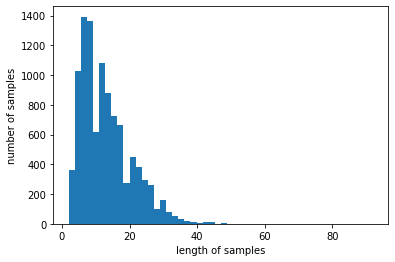

In [15]:
print('대화의 최대 길이 :',max(len(l) for l in X_train))
print('대화의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

Step13. 입력 문장의 최대 길이별로 비율을 측정해 봅니다.

In [16]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [17]:
max_len = 40
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 99.58122321776392


Step14. 설정한 최대길이에 맞춰 데이터셋을 패딩처리합니다.

In [18]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

Step15. 모델 구성을 위한 라이브러리를 로드합니다.

In [19]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Step16. 임베딩층, LSTM층, 전결합층으로 모델을 구성합니다.

In [20]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 32 차원으로 설정
model.add(LSTM(128,dropout=0.2)) # 노드는 128, 드롭아웃으로 20% 설정 
model.add(Dense(9, activation='sigmoid')) # 출력노드는 분류값 9 (8이지만 인덱스 설정 시 1~8로 하여 원핫벡터가 9차원으로 정의됨), 활성함수는 sigmoid(0~1)

Step17. 검증손실값의 최소값이 4회 연속 상승 시 earlystop, 검증정확도값이 최대값일 때만 모델을 저장합니다.

In [21]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

Step18. 모델을 컴파일하고, 훈련을 시작합니다. 손실함수는 다중분류에 사용하는 categorical_crossentropy를 사용합니다.

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/100
137/137 [==============================] - 10s 14ms/step - loss: 1.7502 - acc: 0.4376 - val_loss: 1.5487 - val_acc: 0.4630

Epoch 00001: val_acc improved from -inf to 0.46300, saving model to best_model.h5
Epoch 2/100
137/137 [==============================] - 1s 8ms/step - loss: 1.4414 - acc: 0.4905 - val_loss: 1.4744 - val_acc: 0.4727

Epoch 00002: val_acc improved from 0.46300 to 0.47274, saving model to best_model.h5
Epoch 3/100
137/137 [==============================] - 1s 7ms/step - loss: 1.3223 - acc: 0.5351 - val_loss: 1.4790 - val_acc: 0.4966

Epoch 00003: val_acc improved from 0.47274 to 0.49659, saving model to best_model.h5
Epoch 4/100
137/137 [==============================] - 1s 8ms/step - loss: 1.2467 - acc: 0.5546 - val_loss: 1.4526 - val_acc: 0.5024

Epoch 00004: val_acc improved from 0.49659 to 0.50243, saving model to best_model.h5
Epoch 5/100
137/137 [==============================] - 1s 7ms/step - loss: 1.1967 - acc: 0.5789 - val_loss: 1.4232 - val_acc:

Step19. 모델을 검증해 봅니다.

In [23]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

79/79 [==============================] - 1s 4ms/step - loss: 1.3958 - acc: 0.5532

 테스트 정확도: 0.5532


Step20. 시험데이터셋을 실행시킬 함수를 정의합니다. 이전 전처리과정도 포함시킵니다.

In [24]:
# 휴리스틱 검출규칙 : 비표준어에 대해 직관적인 방법으로 규칙을 만들어 교체
heuristic_rule = [
    ['+', "'"],
    ['-', ' - '],
    ['  +', ' ']
]


def sentiment_predict(new_sentence):
  #new_sentence = new_sentence.replace("[^0-9a-zA-Z ]","") # 숫자영문자 제외한 문자제거
  new_sentence = new_sentence.lower()
  for rule in heuristic_rule:
    new_sentence = new_sentence.replace(rule[0],rule[1]) # 휴리스틱 규칙적용
  new_sentence = word_tokenize(new_sentence)
  #new_sentence = [word for word in new_sentence if not word in stopwords.words('english')] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model.predict(pad_new) # 예측
  #print(np.argmax(score))
  return np.argmax(score)

sentiment_predict('That I did That I did')

1

Step21. 시험데이터를 불러옵니다.

In [25]:
real_data = pd.read_csv(mypath+'en_data.csv')
real_data['Predicted'] = 0
real_data.head()

,id,i_dialog,i_utterance,speaker,utterance,Predicted
0,0,0,0,Phoebe,"Alright, whadyou do with him?",0
1,1,0,1,Monica,Oh! You're awake!,0
2,2,0,2,Joey,Then you gotta come clean with Ma! This is not...,0
3,3,0,3,Mr. Tribbiani,"Yeah, but this is",0
4,4,0,4,Joey,I don't wanna hear it! Now go to my room!,0


Step22. 반복하여 결과를 출력하고, 예측된 인덱스값을 다시 감정단어로 변환시킵니다.

In [26]:
change_value_dict = {1:'neutral', 2:'joy', 3:'sadness', 4:'fear', 5:'anger', 6:'surprise', 7:'disgust', 8:'non-neutral'}

for i in tqdm(real_data.index):
  real_data['Predicted'][i] = change_value_dict[sentiment_predict(real_data['speaker'][i] + ' ' + real_data['utterance'][i])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Step23. 정상처리되었는지 확인합니다.

In [27]:
real_data[:30]

,id,i_dialog,i_utterance,speaker,utterance,Predicted
0,0,0,0,Phoebe,"Alright, whadyou do with him?",neutral
1,1,0,1,Monica,Oh! You're awake!,surprise
2,2,0,2,Joey,Then you gotta come clean with Ma! This is not...,non-neutral
3,3,0,3,Mr. Tribbiani,"Yeah, but this is",neutral
4,4,0,4,Joey,I don't wanna hear it! Now go to my room!,non-neutral
5,5,1,0,Chandler,I don?t want him to tell this story for years.,neutral
6,6,1,1,Ross,"Oh, but he will. He still tells the story how ...",joy
7,7,1,2,Monica,I wasn?t escaping.,neutral
8,8,1,3,Ross,Then how did you get caught in the barbed wire?,non-neutral
9,9,1,4,Monica,I was trying to help out a squirrel.,non-neutral


Step24. 결과를 저장합니다.

In [29]:
real_data.to_csv(mypath+'en_sample.csv',columns=['id','Predicted'],index=False) # 캐글에 올릴 때
#real_data.to_csv('sample_full.csv',columns=['id','utterance','Predicted'],index=False) # 데이터 확인 시
#pd.DataFrame(list(tokenizer.word_counts.items())).to_csv('friends_word_counts.csv',index=False) # 단어집을 추출해 볼 때